In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Multiclass Fish Image Classification Project


# Problem Statement:

**This project focuses on classifying fish images into multiple categories using deep learning models. The task involves training a CNN from scratch and leveraging transfer learning with pre-trained models to enhance performance. The project also includes saving models for later use and deploying a Streamlit application to predict fish categories from user-uploaded images.**

# Business Use Cases

Improved Accuracy: Identify the best deep learning model architecture for fish classification.

Deployment Ready: Provide a user-friendly web app to enable real-time fish species identification.

Model Comparison: Evaluate multiple models to select the most suitable approach based on performance metrics.



In [107]:
import os
print(os.listdir('/kaggle/input'))

['fish-images']


In [108]:
print(os.listdir('/kaggle/input/fish-images'))

['images.cv_jzk6llhf18tm3k0kyttxz']


In [105]:
import os
print(os.listdir('/kaggle/input/fish-images/images.cv_jzk6llhf18tm3k0kyttxz'))

['readme.txt', 'data']


In [106]:
import os
print(os.listdir('/kaggle/input/fish-images/images.cv_jzk6llhf18tm3k0kyttxz/data'))

['val', 'test', 'train']


In [5]:
# Suppress TensorFlow logs for a clean output
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # Only show errors

# Optional: Silence other common warnings
import warnings
warnings.filterwarnings('ignore')

# Now import TensorFlow
import tensorflow as tf

print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.18.0


In [9]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # Only show errors, no info/warnings


In [14]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # Suppress TF logs: 0=all, 1=filter INFO, 2=filter WARNING, 3=filter ERROR

# Optional: silence other Python warnings
import warnings
warnings.filterwarnings('ignore')


# **Setup for training and validation generators**

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

train_dir = '/kaggle/input/fish-images/images.cv_jzk6llhf18tm3k0kyttxz/data/train'
val_dir = '/kaggle/input/fish-images/images.cv_jzk6llhf18tm3k0kyttxz/data/val'

# Data augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
)

# No augmentation for validation set, just rescale
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.


# **Building and training a CNN Model from scratch**

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

num_classes = train_generator.num_classes

model = Sequential([
    Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    
    Conv2D(32, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    
    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 11)             │         2,827 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,248,395 (84.87 MB)

 Trainable params: 22,247,947 (84.87 MB)

 Non-trainable params: 448 (1.75 KB)

# Training CNN

In [15]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',     # Watch validation loss
    patience=3,             # Stop if no improvement for 3 epochs
    restore_best_weights=True
)

EPOCHS = 10

history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)


Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 112s 577ms/step - accuracy: 0.2809 - loss: 2.9667 - val_accuracy: 0.1712 - val_loss: 138.5368
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 71s 364ms/step - accuracy: 0.2845 - loss: 2.4747 - val_accuracy: 0.2335 - val_loss: 5.9056
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 71s 361ms/step - accuracy: 0.2878 - loss: 2.4194 - val_accuracy: 0.3242 - val_loss: 3.4713
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 71s 363ms/step - accuracy: 0.2806 - loss: 2.1713 - val_accuracy: 0.3443 - val_loss: 2.3362
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 72s 366ms/step - accuracy: 0.2861 - loss: 2.0258 - val_accuracy: 0.4048 - val_loss: 2.0067
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 71s 362ms/step - accuracy: 0.3225 - loss: 1.9169 - val_accuracy: 0.4112 - val_loss: 1.9092
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 70s 359ms/step - accuracy: 0.3294 - loss: 1.9397 - val_accuracy: 0.4048 - val_loss: 2.1305
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 71s 362ms/step - accuracy: 0.3395 - loss

In [16]:
model.save('cnn_fish_model.h5')

**Evaluating the CNN Model**

In [17]:
val_loss, val_acc = model.evaluate(validation_generator)
print(f"Validation Accuracy: {val_acc:.4f}")

35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.7005 - loss: 0.9598
Validation Accuracy: 0.4533


**Detailed Classification Metrics**

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Get true labels and predictions
val_generator = validation_generator
val_generator.reset()

preds = model.predict(val_generator)
y_pred = np.argmax(preds, axis=1)
y_true = val_generator.classes

print(classification_report(y_true, y_pred, target_names=val_generator.class_indices.keys()))

35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step
                                  precision    recall  f1-score   support

                     animal fish       0.95      0.99      0.97       187
                animal fish bass       0.00      0.00      0.00        10
   fish sea_food black_sea_sprat       0.52      0.95      0.67       105
   fish sea_food gilt_head_bream       0.00      0.00      0.00        94
   fish sea_food hourse_mackerel       0.23      0.14      0.18        97
        fish sea_food red_mullet       0.43      0.97      0.60        90
     fish sea_food red_sea_bream       0.30      0.84      0.44       113
          fish sea_food sea_bass       0.00      0.00      0.00        97
            fish sea_food shrimp       0.07      0.07      0.07       100
fish sea_food striped_red_mullet       0.60      0.06      0.11       101
             fish sea_food trout       0.07      0.01      0.02        98

                        accuracy                           0.45      1

**visualizing the training history**


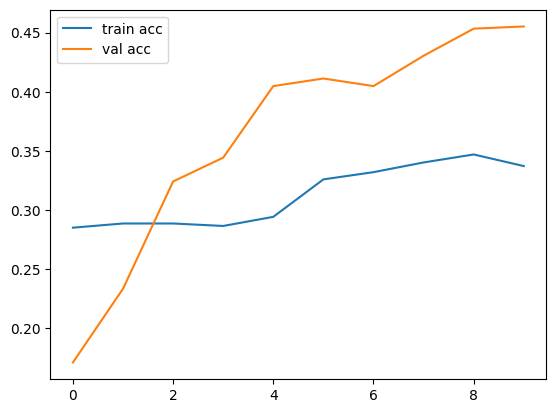

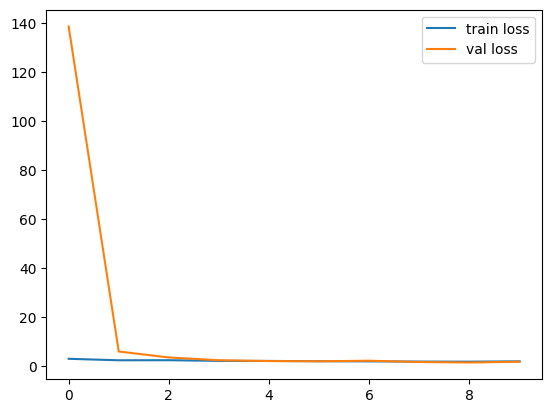

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()


# training 5 pretrained models

In [21]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16, ResNet50, MobileNet, InceptionV3, EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping

def build_pretrained_model(base_model_name, input_shape, num_classes):
    base_model_dict = {
        'VGG16': VGG16,
        'ResNet50': ResNet50,
        'MobileNet': MobileNet,
        'InceptionV3': InceptionV3,
        'EfficientNetB0': EfficientNetB0
    }
    
    base_model_fn = base_model_dict.get(base_model_name)
    if base_model_fn is None:
        raise ValueError(f"Model {base_model_name} not supported.")
    
    base_model = base_model_fn(
        include_top=False,
        weights='imagenet',
        input_shape=input_shape,
        pooling='avg'
    )
    
    base_model.trainable = False  # Freeze base model initially
    
    inputs = layers.Input(shape=input_shape)
    x = base_model(inputs, training=False)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    model = models.Model(inputs, outputs)
    
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Set your input shape and number of classes
IMG_HEIGHT, IMG_WIDTH = 224, 224
input_shape = (IMG_HEIGHT, IMG_WIDTH, 3)
num_classes = 11

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

models_to_train = ['EfficientNetB0','VGG16', 'ResNet50', 'MobileNet', 'InceptionV3']

for model_name in models_to_train:
    print(f"\nTraining {model_name}...")
    model = build_pretrained_model(model_name, input_shape, num_classes)
    history = model.fit(
        train_generator,
        epochs=10,
        validation_data=validation_generator,
        callbacks=[early_stop]
    )
    model.save(f'{model_name}_fish_model.h5')
    print(f"{model_name} saved!\n")



Training EfficientNetB0...
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 113s 450ms/step - accuracy: 0.1300 - loss: 2.3691 - val_accuracy: 0.1712 - val_loss: 2.3248
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 67s 343ms/step - accuracy: 0.1548 - loss: 2.3386 - val_accuracy: 0.1712 - val_loss: 2.3376
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 68s 348ms/step - accuracy: 0.1477 - loss: 2.3386 - val_accuracy: 0.1712 - val_loss: 2.3320
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 68s 347ms/step - accuracy: 0.1547 - loss: 2.3387 - val_accuracy: 0.1712 - val_loss: 2.3214
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 67s 343ms/step - accuracy: 0.1649 - loss: 2.3297 - val_accuracy: 0.1712 - val_loss: 2.3290
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 67s 345ms/step - accuracy: 0.1615 - loss: 2.3362 - val_accuracy: 0.1712 - val_loss: 2.3266
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 68s 349ms/step - accuracy: 0.1462 - loss: 2.3420 - val_accuracy: 0.1712 - val_loss: 2.3136
Epo

In [22]:
import os

print([f for f in os.listdir() if f.endswith('.h5')])


['ResNet50_fish_model.h5', 'MobileNet_fish_model.h5', 'cnn_fish_model.h5', 'EfficientNetB0_fish_model.h5', 'InceptionV3_fish_model.h5', 'VGG16_fish_model.h5']


In [44]:
vgg16_model = build_vgg16_model()
vgg16_model.summary()


Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_18 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,562,821 (105.14 MB)

 Trainable params: 27,562,821 (105.14 MB)

 Non-trainable params: 0 (0.00 B)

# Model Evaluation

In [65]:
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
def get_predictions_and_labels(model, generator):
    # Predict probabilities
    preds = model.predict(generator)
    # Get predicted class indices
    y_pred = np.argmax(preds, axis=1)
    # True class indices from generator
    y_true = generator.classes
    return y_true, y_pred


In [68]:
def evaluate_model(model, generator, class_names):
    y_true, y_pred = get_predictions_and_labels(model, generator)

    print("Classification Report:")
    print(classification_report(y_true, y_pred, target_names=class_names))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()


In [97]:
!ls

cnn_fish_model.h5	      InceptionV3_fish_model.h5  ResNet50_fish_model.h5
EfficientNetB0_fish_model.h5  MobileNet_fish_model.h5	 VGG16_fish_model.h5


In [85]:
class_names = list(validation_generator.class_indices.keys())
print(class_names)


['animal fish', 'animal fish bass', 'fish sea_food black_sea_sprat', 'fish sea_food gilt_head_bream', 'fish sea_food hourse_mackerel', 'fish sea_food red_mullet', 'fish sea_food red_sea_bream', 'fish sea_food sea_bass', 'fish sea_food shrimp', 'fish sea_food striped_red_mullet', 'fish sea_food trout']



Evaluating EfficientNetB0 fine-tuned model...
35/35 ━━━━━━━━━━━━━━━━━━━━ 15s 227ms/step
Classification Report:
                                  precision    recall  f1-score   support

                     animal fish       0.17      1.00      0.29       187
                animal fish bass       0.00      0.00      0.00        10
   fish sea_food black_sea_sprat       0.00      0.00      0.00       105
   fish sea_food gilt_head_bream       0.00      0.00      0.00        94
   fish sea_food hourse_mackerel       0.00      0.00      0.00        97
        fish sea_food red_mullet       0.00      0.00      0.00        90
     fish sea_food red_sea_bream       0.00      0.00      0.00       113
          fish sea_food sea_bass       0.00      0.00      0.00        97
            fish sea_food shrimp       0.00      0.00      0.00       100
fish sea_food striped_red_mullet       0.00      0.00      0.00       101
             fish sea_food trout       0.00      0.00      0.00        98

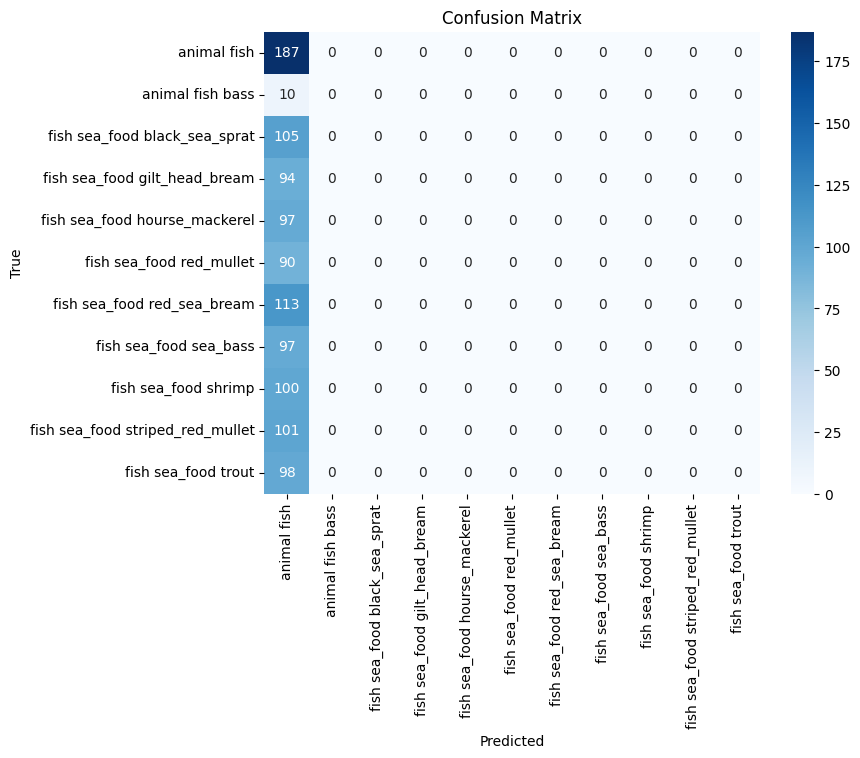


Evaluating VGG16 fine-tuned model...
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 220ms/step
Classification Report:
                                  precision    recall  f1-score   support

                     animal fish       0.95      0.98      0.96       187
                animal fish bass       0.00      0.00      0.00        10
   fish sea_food black_sea_sprat       0.82      0.83      0.82       105
   fish sea_food gilt_head_bream       0.97      0.68      0.80        94
   fish sea_food hourse_mackerel       0.73      0.98      0.84        97
        fish sea_food red_mullet       0.76      0.77      0.76        90
     fish sea_food red_sea_bream       0.83      0.94      0.88       113
          fish sea_food sea_bass       0.93      0.77      0.84        97
            fish sea_food shrimp       0.85      1.00      0.92       100
fish sea_food striped_red_mullet       0.68      0.57      0.62       101
             fish sea_food trout       0.99      0.95      0.97        98

        

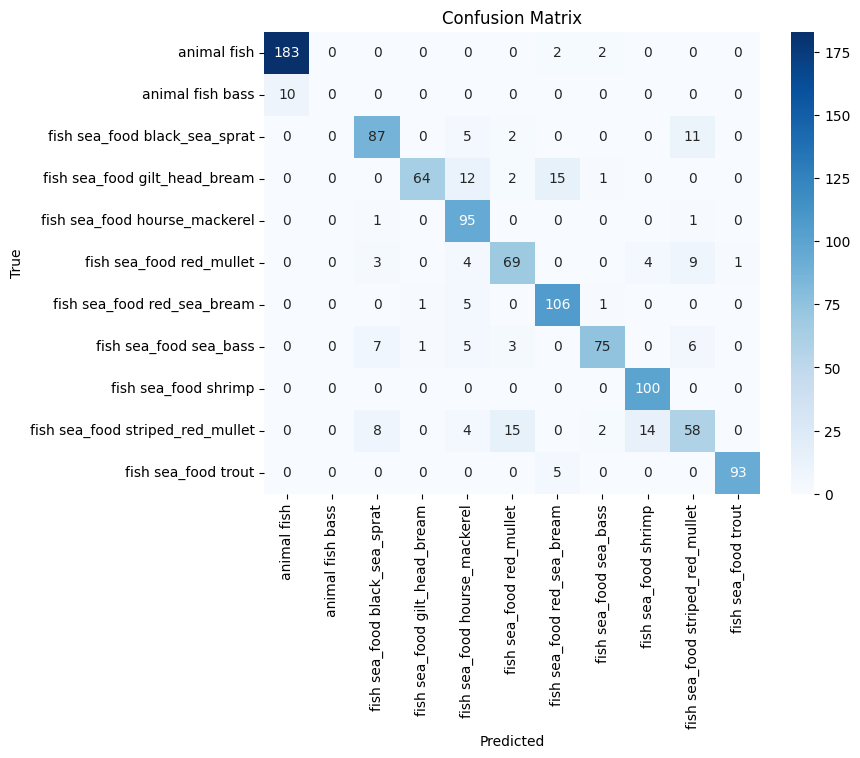


Evaluating ResNet50 fine-tuned model...
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 198ms/step
Classification Report:
                                  precision    recall  f1-score   support

                     animal fish       0.47      0.68      0.56       187
                animal fish bass       0.00      0.00      0.00        10
   fish sea_food black_sea_sprat       0.60      0.06      0.10       105
   fish sea_food gilt_head_bream       0.00      0.00      0.00        94
   fish sea_food hourse_mackerel       0.61      0.11      0.19        97
        fish sea_food red_mullet       0.20      0.74      0.32        90
     fish sea_food red_sea_bream       0.71      0.13      0.22       113
          fish sea_food sea_bass       0.57      0.16      0.26        97
            fish sea_food shrimp       0.35      0.16      0.22       100
fish sea_food striped_red_mullet       0.27      0.31      0.29       101
             fish sea_food trout       0.23      0.58      0.33        98

    

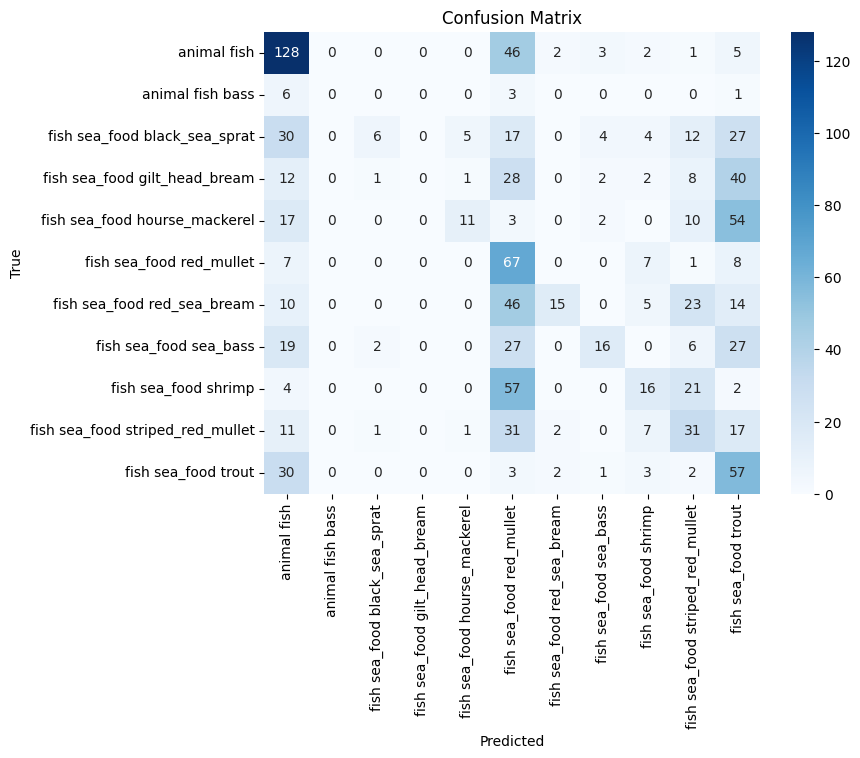


Evaluating MobileNet fine-tuned model...
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step
Classification Report:
                                  precision    recall  f1-score   support

                     animal fish       0.98      1.00      0.99       187
                animal fish bass       1.00      0.60      0.75        10
   fish sea_food black_sea_sprat       1.00      1.00      1.00       105
   fish sea_food gilt_head_bream       1.00      1.00      1.00        94
   fish sea_food hourse_mackerel       0.99      1.00      0.99        97
        fish sea_food red_mullet       0.98      1.00      0.99        90
     fish sea_food red_sea_bream       1.00      1.00      1.00       113
          fish sea_food sea_bass       1.00      1.00      1.00        97
            fish sea_food shrimp       1.00      1.00      1.00       100
fish sea_food striped_red_mullet       1.00      0.97      0.98       101
             fish sea_food trout       1.00      1.00      1.00        98

    

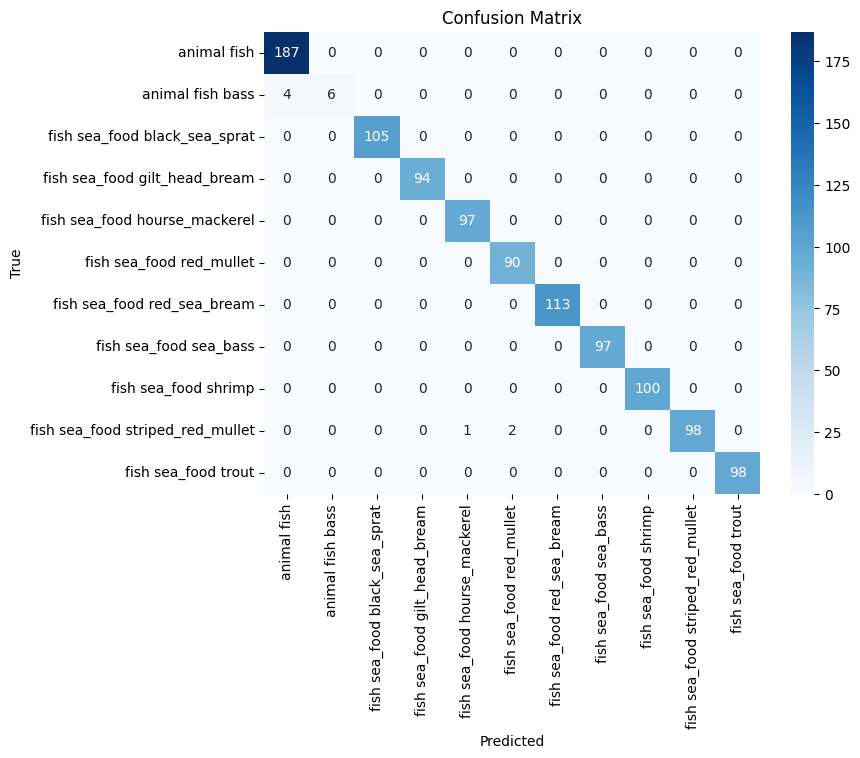


Evaluating InceptionV3 fine-tuned model...
35/35 ━━━━━━━━━━━━━━━━━━━━ 15s 276ms/step
Classification Report:
                                  precision    recall  f1-score   support

                     animal fish       0.95      0.99      0.97       187
                animal fish bass       1.00      0.20      0.33        10
   fish sea_food black_sea_sprat       0.99      0.98      0.99       105
   fish sea_food gilt_head_bream       1.00      0.99      0.99        94
   fish sea_food hourse_mackerel       0.98      0.99      0.98        97
        fish sea_food red_mullet       0.99      0.97      0.98        90
     fish sea_food red_sea_bream       1.00      1.00      1.00       113
          fish sea_food sea_bass       0.99      0.99      0.99        97
            fish sea_food shrimp       1.00      1.00      1.00       100
fish sea_food striped_red_mullet       0.95      0.99      0.97       101
             fish sea_food trout       0.99      0.99      0.99        98

 

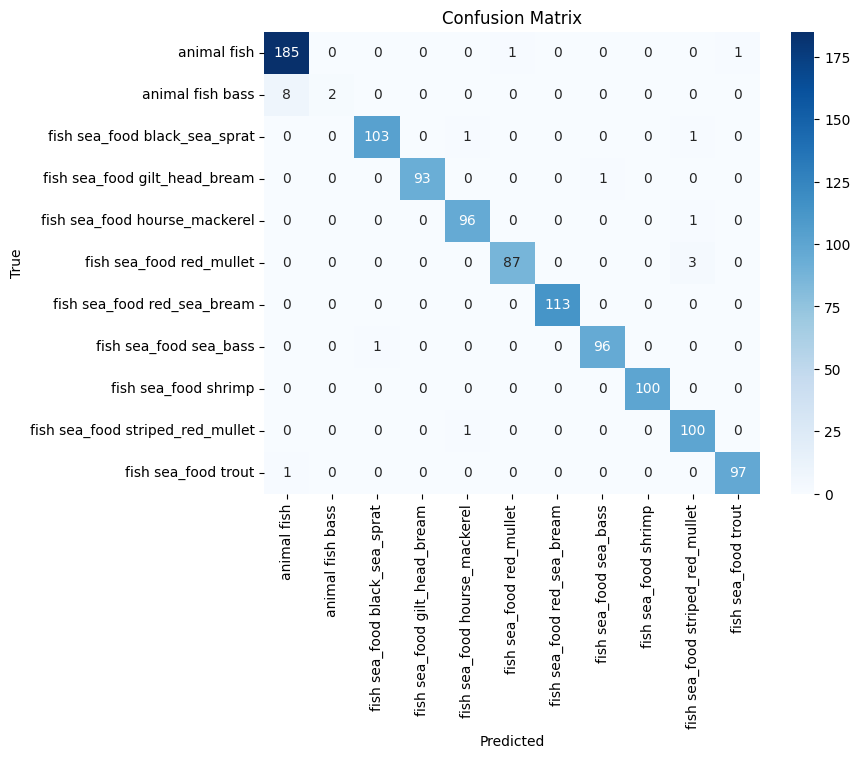

In [88]:
# Define your fish dataset class names
class_names = [
    'animal fish',
    'animal fish bass',
    'fish sea_food black_sea_sprat',
    'fish sea_food gilt_head_bream',
    'fish sea_food hourse_mackerel',
    'fish sea_food red_mullet',
    'fish sea_food red_sea_bream',
    'fish sea_food sea_bass',
    'fish sea_food shrimp',
    'fish sea_food striped_red_mullet',
    'fish sea_food trout'
]

# Dictionary of model names and their respective saved model file paths
model_files = {
    'EfficientNetB0': 'EfficientNetB0_fish_model.h5',
    'VGG16': 'VGG16_fish_model.h5',
    'ResNet50': 'ResNet50_fish_model.h5',
    'MobileNet': 'MobileNet_fish_model.h5',
    'InceptionV3': 'InceptionV3_fish_model.h5'
}

# Loop through each model, load it, and evaluate
for name, filepath in model_files.items():
    print(f"\nEvaluating {name} model...")
    try:
        model = load_model(filepath)
        evaluate_model(model, validation_generator, class_names)
    except Exception as e:
        print(f"Error loading or evaluating {name} model: {e}")


# finding the best model 

In [90]:
from tensorflow.keras.models import load_model

# Your saved model files
model_files = {
    'EfficientNetB0': 'EfficientNetB0_fish_model.h5',
    'VGG16': 'VGG16_fish_model.h5',
    'ResNet50': 'ResNet50_fish_model.h5',
    'MobileNet': 'MobileNet_fish_model.h5',
    'InceptionV3': 'InceptionV3_fish_model.h5'
}

# Class names (your fish dataset)
class_names = [
    'animal fish',
    'animal fish bass',
    'fish sea_food black_sea_sprat',
    'fish sea_food gilt_head_bream',
    'fish sea_food hourse_mackerel',
    'fish sea_food red_mullet',
    'fish sea_food red_sea_bream',
    'fish sea_food sea_bass',
    'fish sea_food shrimp',
    'fish sea_food striped_red_mullet',
    'fish sea_food trout'
]

# Dictionary to store accuracies
model_accuracies = {}

# Evaluate each model and store accuracy
for name, filepath in model_files.items():
    print(f"\nEvaluating {name} model...")
    model = load_model(filepath)
    loss, acc = model.evaluate(validation_generator, verbose=0)
    model_accuracies[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

# Find the best model
best_model_name = max(model_accuracies, key=model_accuracies.get)
best_accuracy = model_accuracies[best_model_name]

print("\n==============================")
print(f"Best Model: {best_model_name}")
print(f"Accuracy: {best_accuracy:.4f}")
print("==============================")



Evaluating EfficientNetB0 model...
EfficientNetB0 Accuracy: 0.1712

Evaluating VGG16 model...
VGG16 Accuracy: 0.8516

Evaluating ResNet50 model...
ResNet50 Accuracy: 0.3178

Evaluating MobileNet model...
MobileNet Accuracy: 0.9936

Evaluating InceptionV3 model...
InceptionV3 Accuracy: 0.9817

Best Model: MobileNet
Accuracy: 0.9936


# Deployment

In [91]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 59.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 99.0 MB/s eta 0:00:00:00:01


In [100]:
from IPython.display import FileLink
FileLink("MobileNet_fish_model.h5")

/kaggle/working/MobileNet_fish_model.h5

# # 🚀 Model Deployment

I built an app.py Streamlit app for image uploads and predictions.

Run the app locally with: "streamlit run app.py" command

Running the app generates a local URL that opens in the browser, allowing users to upload images and view model predictions.